In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,mean_absolute_error,mean_squared_error

In [2]:
df = pd.read_csv('seattle-weather.csv')
df.shape

(1461, 6)

In [3]:
df.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [5]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [6]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [7]:
df['weather']=df['weather'].map({'drizzle':0,'rain':1,'sun':2,'snow':3,'fog':4})

In [8]:
df.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,1
2,2012-01-03,0.8,11.7,7.2,2.3,1
3,2012-01-04,20.3,12.2,5.6,4.7,1
4,2012-01-05,1.3,8.9,2.8,6.1,1
5,2012-01-06,2.5,4.4,2.2,2.2,1
6,2012-01-07,0.0,7.2,2.8,2.3,1
7,2012-01-08,0.0,10.0,2.8,2.0,2
8,2012-01-09,4.3,9.4,5.0,3.4,1
9,2012-01-10,1.0,6.1,0.6,3.4,1


In [9]:
sns.set(rc={'figure.figsize':(20,5)})

Text(0, 0.5, 'max temp')

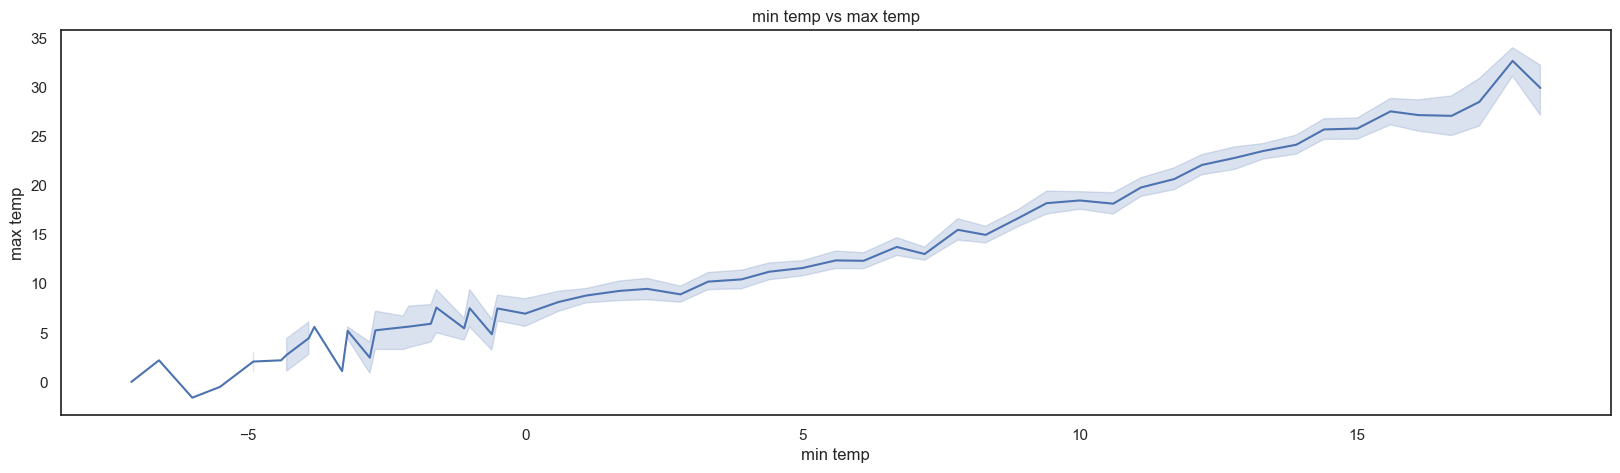

In [10]:
sns.set_style('white')
sns.lineplot(data = df, x = 'temp_min', y = 'temp_max')
plt.title('min temp vs max temp')
plt.xlabel('min temp')
plt.ylabel('max temp')

Text(0, 0.5, 'precipitation')

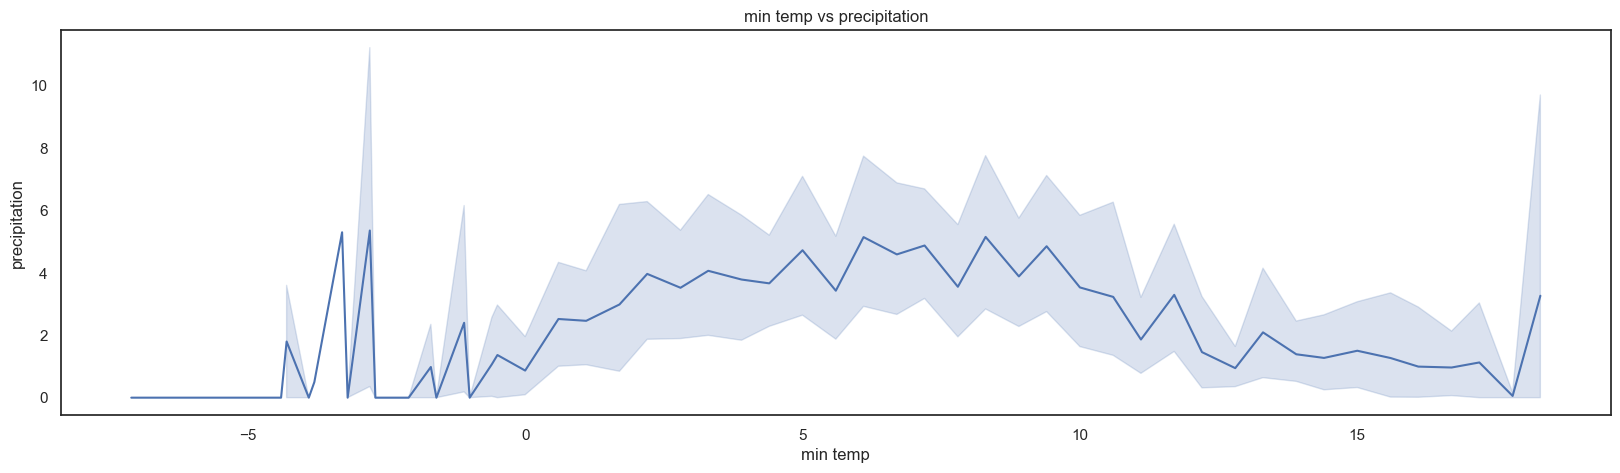

In [11]:
sns.set_style('white')
sns.lineplot(data = df, x = 'temp_min', y = 'precipitation')
plt.title('min temp vs precipitation')
plt.xlabel('min temp')
plt.ylabel('precipitation')

Text(0, 0.5, 'wind')

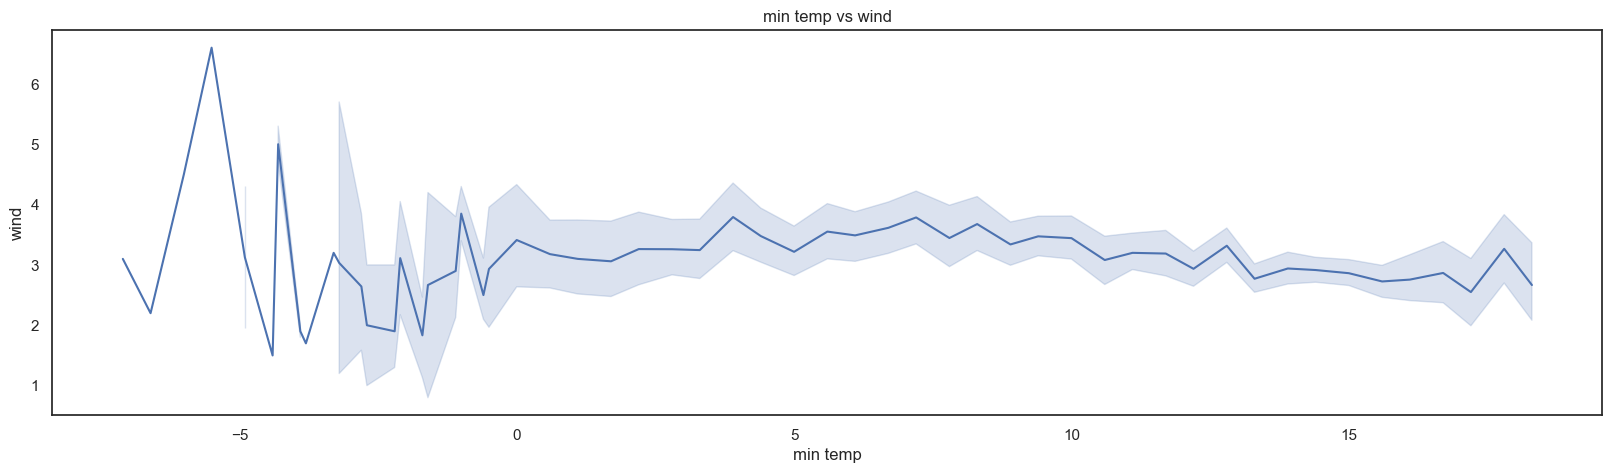

In [12]:
sns.set_style('white')
sns.lineplot(data = df, x = 'temp_min', y = 'wind')
plt.title('min temp vs wind')
plt.xlabel('min temp')
plt.ylabel('wind')

In [13]:
weath_model = LinearRegression()
weath_model_df = pd.DataFrame()

In [14]:
X_data = df.drop(['date','weather'], axis=1)
Y_data = df.drop(['date','temp_min'], axis=1)

In [15]:
X_train_weath, X_test_weath, Y_train_weath, Y_test_weath = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

In [16]:
model_data_X = X_train_weath[['temp_min']]
model_data_Y = Y_train_weath[['temp_max']]
test_data_X = X_test_weath[['temp_min']]
test_data_Y = Y_test_weath[['temp_max']]

In [17]:
weath_model.fit(model_data_X, model_data_Y)

LinearRegression()

In [18]:
pred_data_Y = weath_model.predict(test_data_X)

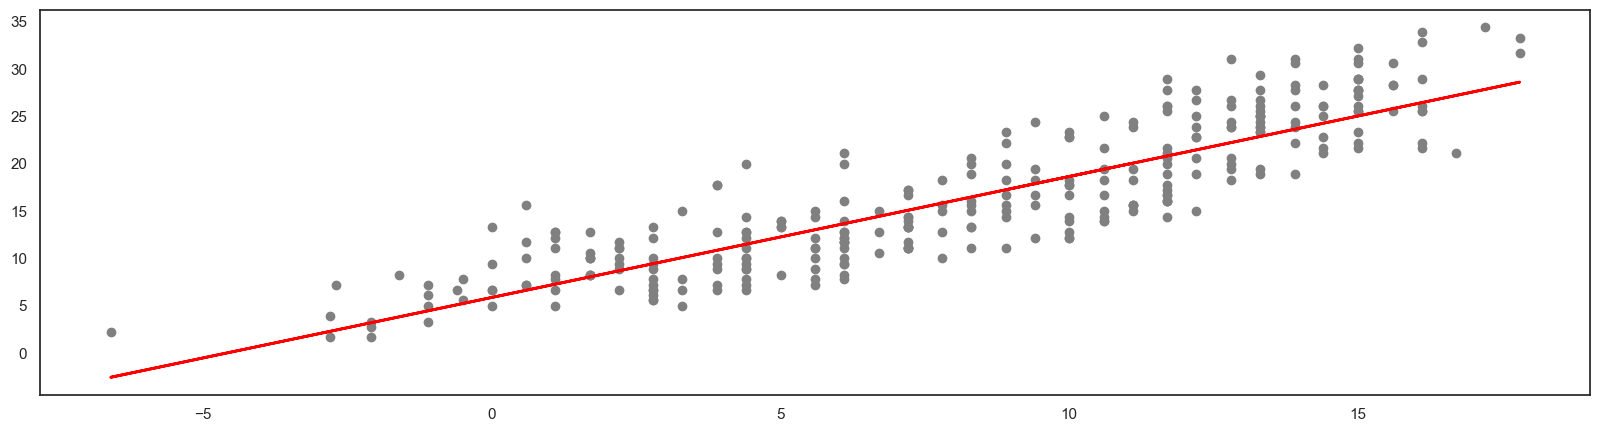

In [19]:
plt.scatter(test_data_X,test_data_Y,color='gray')
plt.plot(test_data_X,pred_data_Y,color='red',linewidth=2)
plt.show()

In [20]:
print('Mean abolute error is:', mean_absolute_error(test_data_Y,pred_data_Y))
print('Mean squared error is:', mean_squared_error(test_data_Y,pred_data_Y))
print('Root mean squared error is:', np.sqrt(mean_squared_error(test_data_Y,pred_data_Y)))

Mean abolute error is: 2.9665232809078974
Mean squared error is: 12.804155987686089
Root mean squared error is: 3.57828953379769


In [21]:
model_data_X = X_train_weath[['temp_min']]
model_data_Y = Y_train_weath[['precipitation']]
test_data_X = X_test_weath[['temp_min']]
test_data_Y = Y_test_weath[['precipitation']]

In [22]:
weath_model.fit(model_data_X, model_data_Y)

LinearRegression()

In [23]:
pred_data_Y = weath_model.predict(test_data_X)

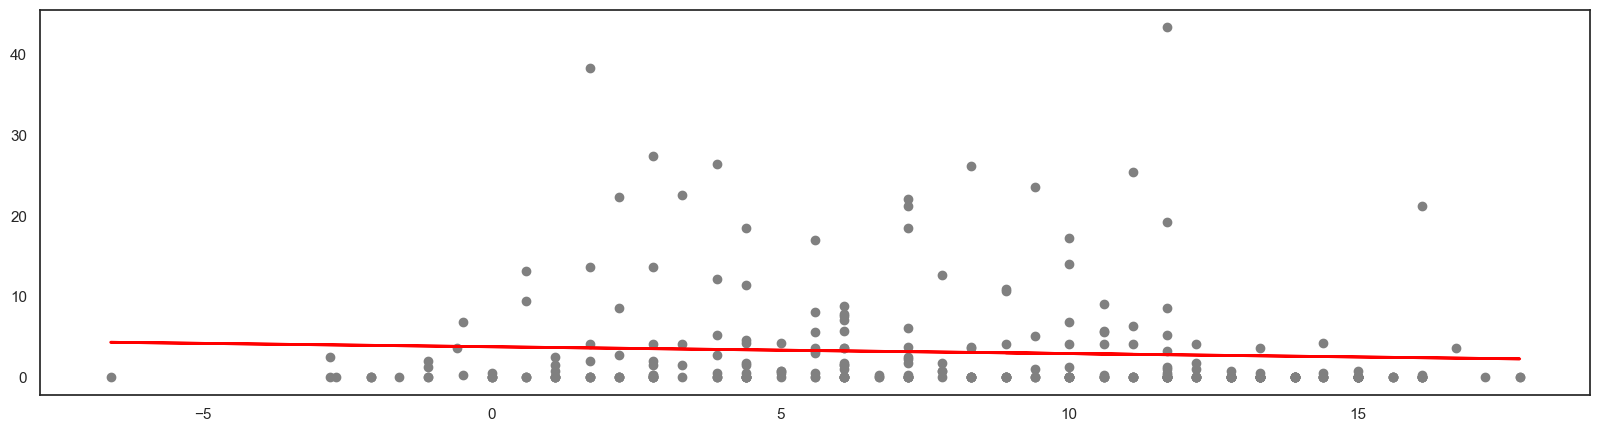

In [24]:
plt.scatter(test_data_X,test_data_Y,color='gray')
plt.plot(test_data_X,pred_data_Y,color='red',linewidth=2)
plt.show()

In [25]:
print('Mean abolute error is:', mean_absolute_error(test_data_Y,pred_data_Y))
print('Mean squared error is:', mean_squared_error(test_data_Y,pred_data_Y))
print('Root mean squared error is:', np.sqrt(mean_squared_error(test_data_Y,pred_data_Y)))

Mean abolute error is: 3.9591841947913062
Mean squared error is: 38.47062027268122
Root mean squared error is: 6.202468885265062


In [26]:
model_data_X = X_train_weath[['temp_min']]
model_data_Y = Y_train_weath[['wind']]
test_data_X = X_test_weath[['temp_min']]
test_data_Y = Y_test_weath[['wind']]

In [27]:
weath_model.fit(model_data_X, model_data_Y)

LinearRegression()

In [28]:
pred_data_Y = weath_model.predict(test_data_X)

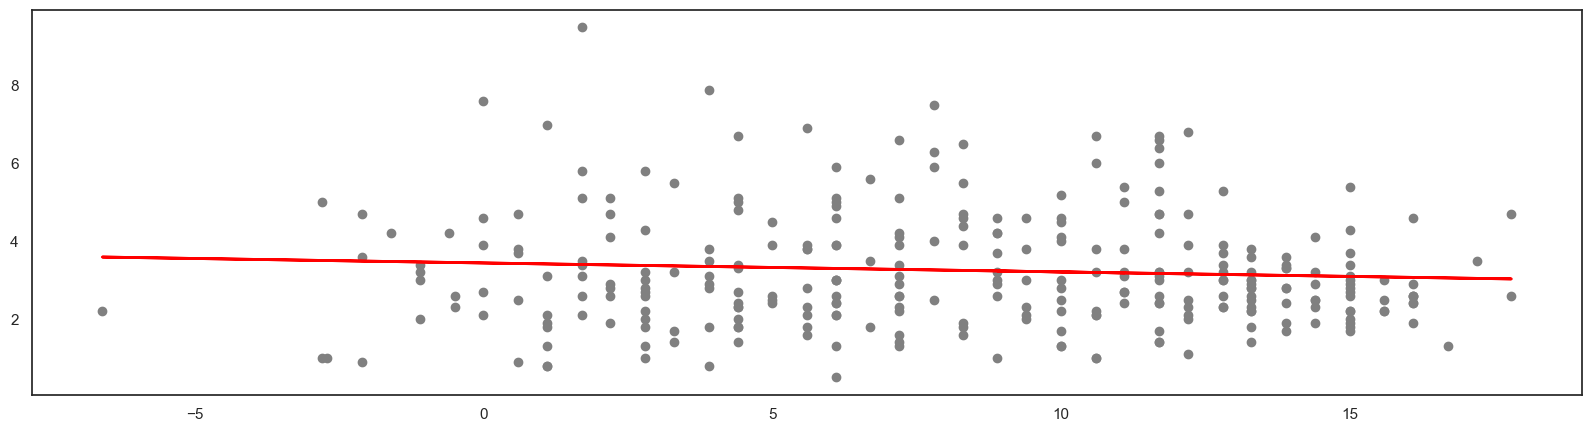

In [29]:
plt.scatter(test_data_X,test_data_Y,color='gray')
plt.plot(test_data_X,pred_data_Y,color='red',linewidth=2)
plt.show()

In [30]:
print('Mean abolute error is:', mean_absolute_error(test_data_Y,pred_data_Y))
print('Mean squared error is:', mean_squared_error(test_data_Y,pred_data_Y))
print('Root mean squared error is:', np.sqrt(mean_squared_error(test_data_Y,pred_data_Y)))

Mean abolute error is: 1.1439258968429291
Mean squared error is: 2.1660460717056975
Root mean squared error is: 1.471749323664087


In [31]:
weath_model = tree.DecisionTreeClassifier()

In [32]:
X_train = X_train_weath
Y_train = Y_train_weath[['weather']]
X_test = X_test_weath
Y_test = Y_test_weath[['weather']]

In [33]:
weath_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [34]:
Y_pred = weath_model.predict(X_test)

In [35]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy is: ",accuracy*100,"%")

Accuracy is:  73.72013651877133 %


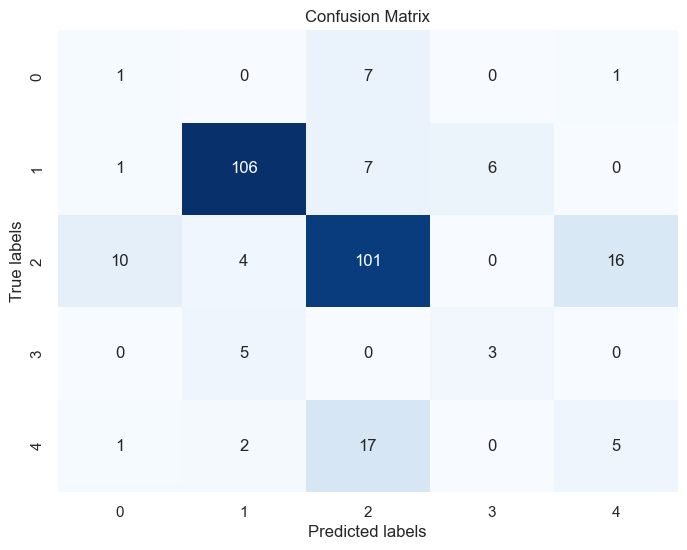

In [36]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()